In [2]:
%pylab inline
import time

#Tasas de destrucción para mRNA y proteína
gr= 3e-5
gp= 5e-6 
#Tasas de creación para mRNA y proteína
kr= 2e-4   
kp= 2e-3 
k=10
#Tiempo
t=3e6
#Pasos de tiempo
dt=t/t
#Numero de celulas
numCell=50

#Matriz que contiene información de la proteína y el mRNA de las 50 celulas y como evolucionan en el tiempo
proteina=zeros((numCell,t))
ARN=zeros((numCell,t))
#Guarda información sobre el promedio de proteínas y mRNA
p=zeros(t)
r=zeros(t)

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Lanza un dado con probabilidad ingresada por parámetro. Retorna 0 (no pasa nada) o 1 (ocurre evento).
def dados (p):
    resultado=binomial(1,p)
    return resultado

In [4]:
ti=time.clock()
for i  in  range (0,numCell):
    for j in range (1, int(t)):
        proteina[i][j]=proteina[i][j-1]+dados(kp*ARN[i][j-1]*dt)-dados(gp*proteina[i][j-1]*dt)
        #modificacion para tener en cuenta retroalimentación
        ARN[i][j]=ARN[i][j-1]+dados(kr*dt/(1+(proteina[i][j-1]*proteina[i][j-1]/(k*k))))-dados(gr*ARN[i][j-1]*dt)
    

    p=p+proteina[i]
    r=r+ARN[i]
            
p=p/numCell
r=r/numCell  
print(time.clock()-ti)

1543.9669920000001


In [6]:
tiempoSimu=1543.96 #Tiempo requerido para 50 celulas en segundos
tiempoTotal=tiempoSimu*200/(10/gp) #Luego el tiempo para 10000 en unidades 10/gp
print("tiempo total de la simulación para 50 celulas:",tiempoSimu,"en segundos")
print("tiempo total de la simulación para 10000 celulas:",tiempoTotal,"en unidades de 10/gp")

tiempo total de la simulación para 50 celulas: 1543.96 en segundos
tiempo total de la simulación para 10000 celulas: 0.154396 en unidades de 10/gp


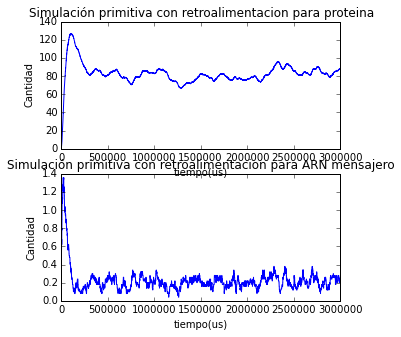

In [7]:
T=arange(0,t)
figure(figsize(5,5))
subplot(2,1,1)
plot(T,p)
title("Simulación primitiva con retroalimentacion para proteina")
ylabel('Cantidad')
xlabel('tiempo(us)')
subplot(2,1,2)
plot(T,r)
title("Simulación primitiva con retroalimentacion para ARN mensajero")
ylabel('Cantidad')
xlabel('tiempo(us)')

el promedio de la distribucion de ARNm es: 0.2 y el ruido es: 2.0
el promedio de la distribucion de proteínas es: 76.5 y el ruido es: 0.534614953765


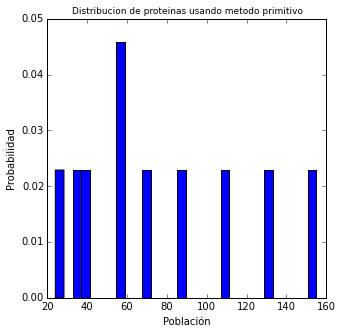

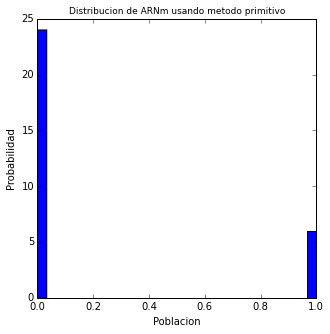

In [8]:
Disp=empty(0)
Disr=empty(0)
#Creación de las distribuciones de proteinas y de ARNm
for i in range (0,10):
    Disp=append(Disp,[proteina[i][len(p)-1]])
    Disr=append(Disr,[ARN[i][len(p)-1]])

#Histograma para proteinas
figure(figsize(5,5)) 
fig=count, bins, ignored = hist(Disp, 30,normed=True)
title("Distribucion de proteinas usando metodo primitivo", size=9)
ylabel('Probabilidad')
xlabel('Población')
sigmap= std(Disp)
promp= mean(Disp)
ruidop=sigmap/promp

#Histograma para ARNm
figure(figsize(5,5))
fig=count, bins, ignored = plt.hist(Disr, 30,normed=True)
title("Distribucion de ARNm usando metodo primitivo", size=9)
ylabel('Probabilidad')
xlabel('Poblacion')
sigmar= std(Disr)
promr = mean(Disr)
ruidor=sigmar/promr

print("el promedio de la distribucion de ARNm es:",promr,"y el ruido es:",ruidor)
print("el promedio de la distribucion de proteínas es:",promp,"y el ruido es:",ruidop)